### Add Two Binary Numbers and Return Their Sum as a Binary Number

__Implement the following function:__

In [ ]:
"""def add_binary(bin_num1, bin_num2):
    bin_num1 - type: str
    bin_num2 - type: str
    return value - type: str"""

This function is given bin_num1 and bin_num2 which are two binary numbers represented as
strings. __When called, it should return their sum (also represented as a binary string). Do not use
any python bit manipulation functions such as bin( ).__

ex) add_binary("11", "1") should return "100".

The idea here is to convert the two given binary numbers (represented by strings) into decimal form. Then we can obtain their sum and convert this decimal sum into a binary string, which will be returned. Let us break each of these steps down further, to fully understand how to solve this problem. 

#### Converting From Binary To Decimal

To convert from binary to decimal, it is important to understand that the indices, or the value we raise the 2 by, go from right to left (ascending). Take a look at the example image below. If we take the binary value $1010_{2}$, we can assign each number (0s and 1s) an index going from right to left. So, the first 0 on the right would be index 0, the 1 would have index 1, the second 0 would have index 2, and the second 1 would have index 3. In this way, if we raise 2 to the index value and multiply by either the 1 or the 0, we can make the conversion, as shown by the conversion step. Taking the sum of these values, we obtain the decimal sum (in this case, $10_{10}$). 

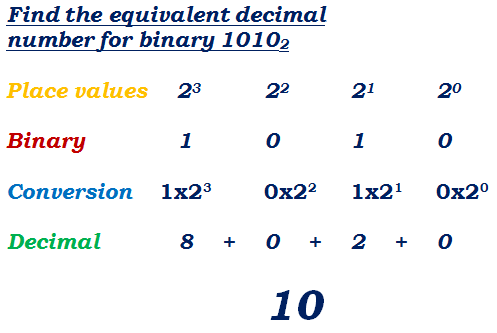

As opposed to the __right to left__ indexing we use to convert from binary to decimal, Python string indexing works from __left to right__. So, if we were to use a for loop to iterate through the given binary number strings and raise 2 to the power of their index, we would obtain an incorrect value, since we would be using an incorrect power/index. In other words, using the same binary number as the previous example, $1010_{2}$, string indexing proceeding left to right would produce the sum: 1x$2^{0}$ + 0x$2^{1}$ + 1x$2^{2}$ + 0x$2^{3}$ = 1 + 4 = 5, instead of 10.

To avoid this calculation error, we can reverse the binary number strings using slicing, so that we can iterate normally. For example, the code to reverse the first binary number string would look something like: bin_num1 = bin_num1[__::__-1]. 

For the actual conversion of each of the binary numbers, we can set two new variables (representing the respective decimal values of the given binary ones) equal to 0. Then using a for loop, we can iterate through the length of the binary strings. If the element is a '1', then we can add 2 raised to the index value to the decimal variable we initialized to 0. Doing this for both binary strings 1 and 2, we get their decimal values, num1 and num2. Adding num1 and num2 gives us the decimal sum.

#### Converting From Decimal To Binary

Now, we must convert the decimal sum into a binary number which we can return as a string. First, we can initialize a variable as an empty string, bin_num, to create our binary number. Iterating through a for loop, we can basically perform the opposite of what we did when converting from binary to decimal. This time, we will iterate through a descending range and check if the total decimal sum is divisible by 2 raised to the power of the index number. If the remainder does not equal 0 (not divisible), we can add a '1' to the variable bin_num and set the total decimal sum equal to the remainder using the modulo operator. Else, if the total is divisible, we would add '0'.

To clean up our result a bit, we want to get rid of any leading zeros. For example, we would want a decimal sum of 10 to return as '1010' instead of '00001010'. We can do this by finding the first '1' using the string find method and then returning the substring after slicing, to start only from the first '1'.

In [1]:
import math 

def add_binary(bin_num1, bin_num2):
    
    #converting from binary to decimal
    bin_num1 = bin_num1[::-1]
    bin_num2 = bin_num2[::-1]
    
    num1 = 0
    num2 = 0
    
    for i in range(len(bin_num1)):
        if bin_num1[i] == '1':
            num1 += math.pow(2, i)
    
    for j in range(len(bin_num2)):
        if bin_num2[j] == '1':
            num2 += math.pow(2, j)
    
    #converting from binary to decimal
    total = num1 + num2
    bin_sum = ""
    for num in range(7, -1, -1):
        if total // (math.pow(2, num)) != 0:
            bin_sum += '1'
            total %= math.pow(2, num)
        else:
            bin_sum += '0'

    #disregard leading zeros before first '1'        
    first = bin_sum.find('1')
    if first != -1:
        return bin_sum[first: ]
    else:
        return bin_sum
 
# tester code
print(add_binary('11', '1'))
print(add_binary('10101', '101'))

100
11010


The runtime of this function is T(n) = O(n). The for loops all run in O(n) and the string find method worst-case is O(n) since the substring is only of length 1, so the time complexity is linear.